### Rotate cifar100 images

In [18]:
import pandas as pd
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

In [19]:
def rotate_image(image_array:np.array) -> np.array:

    image = image_array.copy()

    height, width = image.shape[:2]
    diagonal = np.sqrt(height ** 2 + width ** 2)
    padding = int((diagonal - min(height, width)) / 2)

    # Add padding to the image using BORDER_REFLECT or BORDER_REPLICATE mode
    padded_image = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_REFLECT)

    # Calculate the center of the padded image
    center_x = width // 2 + padding
    center_y = height // 2 + padding

    # Define the rotation angle (e.g., 30 degrees)
    angle = 30

    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((center_x, center_y), angle, 1.0)

    # Apply the rotation to the padded image
    rotated = cv2.warpAffine(padded_image, rotation_matrix, (padded_image.shape[1], padded_image.shape[0]), flags=cv2.INTER_LINEAR)

    # Crop the rotated image to remove the padding
    rotated_cropped = rotated[padding:-padding, padding:-padding]

    return rotated_cropped

In [20]:
def visualize(original, augmented):
    original = original.astype(np.uint8)
    augmented = augmented.astype(np.uint8)
    rgb1 = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    rgb2 = cv2.cvtColor(augmented, cv2.COLOR_BGR2RGB)
    fig = plt.figure()
    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(rgb1)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title('Augmented image')
    plt.imshow(rgb2)
    plt.axis("off")

In [21]:
def rotate_cifar100_images(cifar100_csv_path:str):
    df_cifar100=pd.read_csv(cifar100_csv_path)
    pixels = [col for col in df_cifar100.columns if col.startswith('pixel')]
    # Create an empty DataFrame with the same columns
    df_cifar100_rotated = pd.DataFrame(columns=df_cifar100.columns)
    for img_index in range(0,df_cifar100.shape[0]):
        
        #log:
        print(f'img_index: {img_index}')
        
        # Access the row data by index using .iloc
        row = df_cifar100.iloc[img_index]

        # Extract image pixels from the row
        img = row[pixels].values
        img = img.reshape(32,32,3).astype('uint8')    

        label_number = row["label"]
        rotate_img = rotate_image(img)
    #     # Flatten the rotated image to a 1-dimensional array
    #     flattened_img = rotate_img.ravel()
        if(img_index==0 or img_index%1000==0):
            visualize(img,rotate_img)
        # Create a new row for the rotated image with the same format

        rotated_img_df = pd.DataFrame(rotate_img.reshape(1, -1), columns=pixels)
        rotated_img_df['label'] = label_number
        rotated_img_df['source'] = 'cifar-100_rotated'
#         new_row = {f'pixel_{i}': pixel_value for i, pixel_value in enumerate(rotate_img)}
#         new_row['label'] = label_number
#         new_row['source'] = 'cifar-100_rotated'

        # Append the new row to the rotated DataFrame
#         df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
        df_cifar100_rotated = pd.concat([df_cifar100_rotated,rotated_img_df])
    return df_cifar100_rotated

In [22]:
dataset_csv_path = "C://Users//me//Desktop//Applied Bootkamp//project2//data//combine_dataset.csv"

In [24]:
df_cifar100_rotated = rotate_cifar100_images(dataset_csv_path)

In [4]:
df_dataset=pd.read_csv(dataset_csv_path)
df_cifar100 = df_dataset[df_dataset['source'] == 'cifar-100']

In [5]:
df_dataset['source']

0         cifar-10
1         cifar-10
2         cifar-10
3         cifar-10
4         cifar-10
           ...    
68995    cifar-100
68996    cifar-100
68997    cifar-100
68998    cifar-100
68999    cifar-100
Name: source, Length: 69000, dtype: object

In [6]:
print(df_cifar100.shape)

(9000, 3075)


In [7]:
pixels = [col for col in df_cifar100.columns if col.startswith('pixel')]

In [8]:
print(df_cifar100[pixels].shape)

(9000, 3072)


In [ ]:
# Create an empty DataFrame with the same columns
df_cifar100_rotated = pd.DataFrame(columns=df_cifar100.columns)
for img_index in range(0,df_cifar100.shape[0]):
    # Access the row data by index using .iloc
    row = df_cifar100.iloc[img_index]
    
    # Extract image pixels from the row
    img = row[pixels].values
    img = img.reshape(32,32,3).astype('uint8')    
    
    label_number = row["label"]
    rotate_img = rotate_image(img)
#     # Flatten the rotated image to a 1-dimensional array
#     flattened_img = rotate_img.ravel()
    if(img_index==0 or img_index%1000==0):
        visualize(img,rotate_img)
    # Create a new row for the rotated image with the same format
    new_row = {f'pixel_{i}': pixel_value for i, pixel_value in enumerate(rotate_img)}
    new_row['label'] = label_number
    new_row['source'] = 'cifar-100_rotated'
    
    # Append the new row to the rotated DataFrame
    df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cifar100_rotated = df_cifar100_rotated.append(new_row, ignore_index=True)
C:\Users\me\AppData\Local\Temp\ipykernel_3700\1811321161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [ ]:
df_cifar100_rotated.shape

In [63]:
row=df_cifar100.iloc[100]

In [71]:
img = row[pixels].values
print(img.shape)
img = img.reshape(32,32,3).astype('uint8')    

label_number = row["label"]
rotate_img = rotate_image(img)



# Create a new row for the rotated image with the same format
new_row = {f'pixel_{i}': pixel_value for i, pixel_value in enumerate(rotate_img.reshape(3072,))}
new_row['label'] = label_number
new_row['source'] = 'cifar-100_rotated'

(3072,)


In [72]:
new_row

{'pixel_0': 63,
 'pixel_1': 72,
 'pixel_2': 79,
 'pixel_3': 63,
 'pixel_4': 72,
 'pixel_5': 79,
 'pixel_6': 61,
 'pixel_7': 74,
 'pixel_8': 78,
 'pixel_9': 81,
 'pixel_10': 86,
 'pixel_11': 78,
 'pixel_12': 104,
 'pixel_13': 94,
 'pixel_14': 71,
 'pixel_15': 98,
 'pixel_16': 78,
 'pixel_17': 48,
 'pixel_18': 79,
 'pixel_19': 58,
 'pixel_20': 37,
 'pixel_21': 99,
 'pixel_22': 79,
 'pixel_23': 67,
 'pixel_24': 164,
 'pixel_25': 143,
 'pixel_26': 123,
 'pixel_27': 201,
 'pixel_28': 173,
 'pixel_29': 145,
 'pixel_30': 176,
 'pixel_31': 145,
 'pixel_32': 122,
 'pixel_33': 155,
 'pixel_34': 126,
 'pixel_35': 108,
 'pixel_36': 144,
 'pixel_37': 114,
 'pixel_38': 97,
 'pixel_39': 133,
 'pixel_40': 106,
 'pixel_41': 94,
 'pixel_42': 127,
 'pixel_43': 111,
 'pixel_44': 108,
 'pixel_45': 136,
 'pixel_46': 112,
 'pixel_47': 109,
 'pixel_48': 149,
 'pixel_49': 119,
 'pixel_50': 104,
 'pixel_51': 181,
 'pixel_52': 156,
 'pixel_53': 134,
 'pixel_54': 189,
 'pixel_55': 157,
 'pixel_56': 132,
 'pixel_5

In [18]:
df_cifar100.loc[0,pixels].shape

(3072,)

In [54]:
img = df_cifar100.loc[100,pixels]
print(img.values.shape)
img = img.values.reshape(32,32,3).astype('uint8')
img

KeyError: 100

In [37]:
rotated_img = rotate_image(img)

In [38]:
rotated_img.shape

(32, 32, 3)

In [53]:
type(rotated_img)

numpy.ndarray

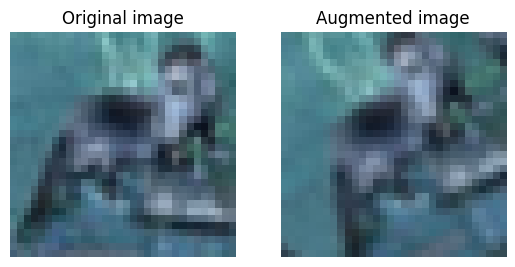

In [43]:
visualize(img, rotated_img)

In [2]:
import pandas as pd

In [5]:
df = pd.DataFrame([{1,1},{2,3}])

In [6]:
pd.DataFrame.sample(df)

,0,1
1,2,3.0
